## Why reduce dimentionality?
- less complex
- less computation time
- lower chance of model overfitting

#### Difference between Feature selection & Feature extraction
**Feature Selection**: selectively choose which one you want
**Feature extraction**: combine existing features to create new features

#### t-SNE visualization of high-dimensional data
a technique to visualize high dimensional data using feature extraction


In [1]:
import pandas as pd

male = pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/28edd853c0a6aa7316b0d84a21f8e0d821e5010d/ANSUR_II_MALE.csv')
female = pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/802fc5cdbe3a29248483e496a966627ea9629e7a/ANSUR_II_FEMALE.csv')

C:\Users\IanLim\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\IanLim\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
C:\Users\IanLim\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
ansur_df = pd.concat([male, female])
ansur_df.Gender.value_counts()

Male      4082
Female    1986
Name: Gender, dtype: int64

In [3]:
#ansur_df.dtypes
to_drop = ['Branch','Component','BMI_class','Height_class']
ansur_df = ansur_df.drop(to_drop, axis = 1)

In [4]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis = 1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

1821 rows in test set vs. 4247 in training set. 94 Features.


In [5]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

C:\Users\IanLim\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


66.3% accuracy on test set vs. 100.0% on training set


#### Accuracy after dimensionality reduction went through the roof

In [6]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

C:\Users\IanLim\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


93.0% accuracy on test set vs. 93.5% on training set


#### Features with missing values or little variance

In [7]:
from matplotlib import pyplot as plt

head_df = ansur_df[['headbreadth', 'headcircumference', 'headlength', 'tragiontopofhead']]
head_df.boxplot()
plt.show()

<Figure size 640x480 with 1 Axes>

#### Finding a good variance threshold

In [8]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

headbreadth          0.001679
headcircumference    0.001030
headlength           0.001868
tragiontopofhead     0.002640
dtype: float64


#### Features with low variance

This is the output from the sample, hence the threshold chosen is 0.001<br>
headbreadth          3.888385e+01<br>
headcircumference    3.345658e+02<br>
headlength           7.200157e+01<br>
tragiontopofhead     4.435149e+01<br>
n_hairs              1.002554e+02<br>
measurement_error    1.307876e-28<br>

In [9]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))
# there are 2 fake columns that i didnt have, else the results would have said from 6 to 4

Dimensionality reduced from 4 to 4.


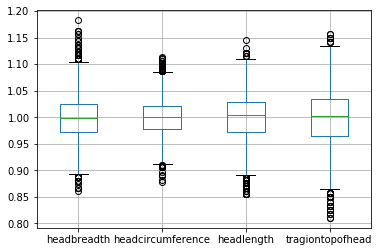

In [10]:
import numpy as np
# Normalize the data
normalized_df = head_df / np.mean(head_df)

normalized_df.boxplot()
plt.show()

#### Removing features with many missing values

In [11]:
school_df = pd.read_csv('Public_Schools2.csv')

# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:,mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


#### Pairwise correlation
##### Visualizing the correlation matrix

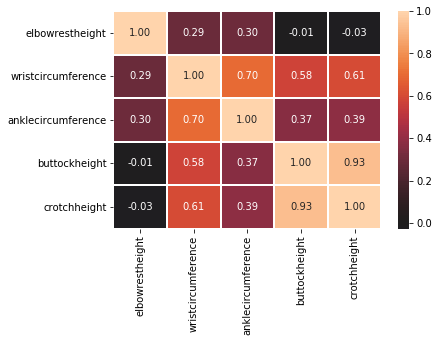

In [12]:
import seaborn as sns
pair_df = ansur_df[['elbowrestheight', 'wristcircumference', 'anklecircumference', 'buttockheight', 'crotchheight']]

# Create the correlation matrix
corr = pair_df.corr()

# Draw the heatmap
sns.heatmap(corr, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

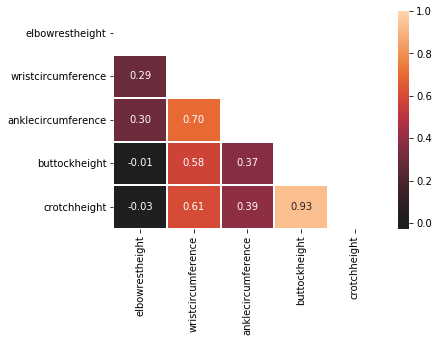

In [13]:
# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

#### Removing Highly Correlated Features

In [14]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The reduced dataframe has 76 columns.


### Feature selection 2: selecting for model accuracy

In [15]:
pima_indians = pd.read_csv('PimaIndians.csv')
pima_indians.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
0,1,89,66,23,94,28.1,0.167,21,negative
1,0,137,40,35,168,43.1,2.288,33,positive
2,3,78,50,32,88,31.0,0.248,26,positive
3,2,197,70,45,543,30.5,0.158,53,positive
4,1,189,60,23,846,30.1,0.398,59,positive


In [16]:
X = pima_indians.loc[:, pima_indians.columns != 'test']
y = pima_indians.loc[:, pima_indians.columns == 'test']

In [17]:
## No elimination
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
lr = LogisticRegression()

X_train_std = scaler.fit_transform(X_train)
lr.fit(X_train_std, y_train.values.ravel())
X_test_std = scaler.transform(X_test)
y_pred = lr.predict(X_test_std)

print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred)))
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))                                           

81.4% accuracy on test set.
{'pregnant': 0.27, 'glucose': 1.06, 'diastolic': 0.05, 'triceps': 0.06, 'insulin': 0.03, 'bmi': 0.48, 'family': 0.11, 'age': 0.33}


#### Manual Recursive Feature Elimination

In [18]:
# Remove the feature with the lowest model coefficient
X = pima_indians[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

80.6% accuracy on test set.
{'pregnant': 0.05, 'glucose': 1.23, 'triceps': 0.24, 'insulin': 0.2, 'bmi': 0.39, 'family': 0.34, 'age': 0.35}


In [19]:
# Only keep the feature with the highest coefficient
X = pima_indians[['glucose']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model to the data
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

76.5% accuracy on test set.
{'glucose': 1.27}


#### Automative Recursive Feature Elimination

In [20]:
X = pima_indians.loc[:, pima_indians.columns != 'test']
y = pima_indians.loc[:, pima_indians.columns == 'test']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

from sklearn.feature_selection import RFE
# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# fits the eliminator to the data
rfe.fit(X_train_std, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test_std))

print("{0:.1%} accuracy on test set.".format(acc)) 

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 1, 'glucose': 1, 'diastolic': 4, 'triceps': 5, 'insulin': 6, 'bmi': 1, 'family': 2, 'age': 3}
Index(['pregnant', 'glucose', 'bmi'], dtype='object')
70.3% accuracy on test set.


#### Building a random forest model

In [21]:
from sklearn.ensemble import RandomForestClassifier
# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Calculate the accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print("{0:.1%} accuracy on test set.".format(acc))

{'pregnant': 0.09, 'glucose': 0.21, 'diastolic': 0.08, 'triceps': 0.11, 'insulin': 0.13, 'bmi': 0.09, 'family': 0.12, 'age': 0.16}
77.6% accuracy on test set.


In [22]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Prints out the mask
print(mask)

# Apply the mask to the feature dataset X
reduced_X = X.loc[:,mask]

# prints out the selected column names
print(reduced_X.columns)

[False  True False False False False False  True]
Index(['glucose', 'age'], dtype='object')


#### Recursive Feature Elimination with random forests

In [23]:
# Wrap the feature eliminator around the random forest model
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask using an attribute of rfe
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Index(['glucose', 'family'], dtype='object')


#### Creating a LASSO regressor

In [24]:
from sklearn.linear_model import Lasso
ansur_df = pd.concat([male, female])
X = ansur_df.loc[:, ansur_df.columns != 'BMI']
y = ansur_df.loc[:, ansur_df.columns == 'BMI']
X = X.drop(['Branch','Component','BMI_class','Height_class','Gender'], axis=1)

# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict 82.9% of the variance in the test set.
The model has ignored 83 out of 93 features.


#### Adjusting the regulization strength

In [26]:
# Find the highest alpha value with R-squared above 98%
la = Lasso(alpha=0.1, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))

The model can predict 98.5% of the variance in the test set.
69 out of 93 features were ignored.


#### Creating a LassoCV regressor

In [27]:
X = male.loc[:, male.columns != 'bicepscircumferenceflexed']
y = male.loc[:, male.columns == 'bicepscircumferenceflexed']
X = X.drop(['Branch','Component','BMI_class','Height_class','Gender'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

Optimal alpha = 2.626
The model explains 86.8% of the test set variance
52 features out of 93 selected


#### Ensemble models for extra votes

In [28]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
gb_mask = rfe_gb.support_

Fitting estimator with 93 features.
Fitting estimator with 90 features.
Fitting estimator with 87 features.
Fitting estimator with 84 features.
Fitting estimator with 81 features.
Fitting estimator with 78 features.
Fitting estimator with 75 features.
Fitting estimator with 72 features.
Fitting estimator with 69 features.
Fitting estimator with 66 features.
Fitting estimator with 63 features.
Fitting estimator with 60 features.
Fitting estimator with 57 features.
Fitting estimator with 54 features.
Fitting estimator with 51 features.
Fitting estimator with 48 features.
Fitting estimator with 45 features.
Fitting estimator with 42 features.
Fitting estimator with 39 features.
Fitting estimator with 36 features.
Fitting estimator with 33 features.
Fitting estimator with 30 features.
Fitting estimator with 27 features.
Fitting estimator with 24 features.
Fitting estimator with 21 features.
Fitting estimator with 18 features.
Fitting estimator with 15 features.
Fitting estimator with 12 fe

In [29]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_

Fitting estimator with 93 features.
Fitting estimator with 90 features.
Fitting estimator with 87 features.
Fitting estimator with 84 features.
Fitting estimator with 81 features.
Fitting estimator with 78 features.
Fitting estimator with 75 features.
Fitting estimator with 72 features.
Fitting estimator with 69 features.
Fitting estimator with 66 features.
Fitting estimator with 63 features.
Fitting estimator with 60 features.
Fitting estimator with 57 features.
Fitting estimator with 54 features.
Fitting estimator with 51 features.
Fitting estimator with 48 features.
Fitting estimator with 45 features.
Fitting estimator with 42 features.
Fitting estimator with 39 features.
Fitting estimator with 36 features.
Fitting estimator with 33 features.
Fitting estimator with 30 features.
Fitting estimator with 27 features.
Fitting estimator with 24 features.
Fitting estimator with 21 features.
Fitting estimator with 18 features.
Fitting estimator with 15 features.
Fitting estimator with 12 fe

#### Combining 3 feature selectors

In [30]:
# np.sum([np.array([True,False,False]),np.array([False,True,True])], axis=0)
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)
print(votes)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3
print(meta_mask)

# Apply the dimensionality reduction on X
X_reduced = X.loc[:,meta_mask]
print(X_reduced.columns)

[1 0 0 0 0 1 0 1 1 3 0 1 0 0 2 1 1 0 0 1 1 3 1 3 1 1 1 1 0 0 0 0 0 0 0 0 3
 3 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 3 1 1 1 1 0 1 0
 1 3 1 1 0 0 1 1 0 1 1 3 1 1 1 0 1 0 2]
[False False False False False False False False False  True False False
 False False False False False False False False False  True False  True
 False False False False False False False False False False False False
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False  True False False False False False False False False
 False  True False False False False False False False]
Index(['bideltoidbreadth', 'chestbreadth', 'chestdepth',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'shouldercircumference', 'thighcircumference', 'waistdepth'],
      dtype='object')


#### Combining 3 feature selectors

In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))

The model can explain 83.7% of the variance in the test set using 1 features.


### Feature extraction
#### Manual feature extraction

In [45]:
sales_df = pd.read_csv('grocery_sales.csv')

In [46]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue']/ sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['quantity','revenue'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


In [56]:
import random 
weight_kg = [random.randint(50,100) for p in range(0,50)]
height_1 = [random.uniform(1,2) for p in range(0,50)]
height_2 = [random.uniform(1,2) for p in range(0,50)]
height_3 = [random.uniform(1,2) for p in range(0,50)]

In [59]:
height_df = pd.DataFrame(list(zip(weight_kg, height_1, height_2, height_3)), columns=['weight_kg','height_1','height_2','height_3'])

In [60]:
# Calculate the mean height
height_df['height'] = height_df[['height_1','height_2','height_3']].mean(axis=1)

# Drop the 3 original height features
reduced_df = height_df.drop(['height_1','height_2','height_3'], axis=1)

print(reduced_df.head())

   weight_kg    height
0         51  1.409514
1         82  1.725601
2         80  1.348772
3         61  1.383339
4         92  1.342383


#### Calculating Principal Components

In [64]:
short_ansur_df = ansur_df[['buttockheight', 'waistcircumference', 'shouldercircumference']]

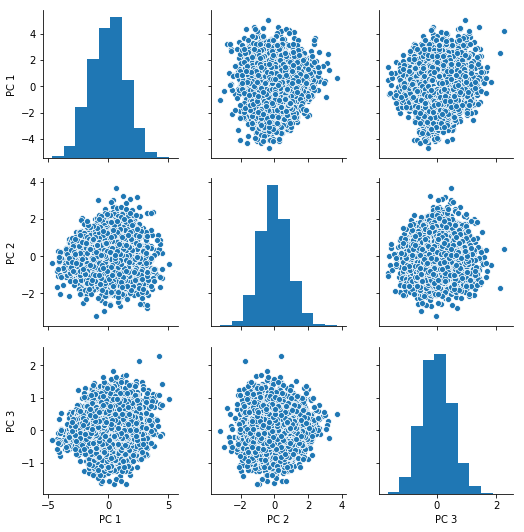

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler
scaler = StandardScaler()
ansur_std = scaler.fit_transform(short_ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3'])

# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)
plt.show()

#### PCA on a larger dataset

In [69]:
long_ansur_df = ansur_df[['stature_m', 'buttockheight', 'waistdepth', 'span', 'waistcircumference', 'shouldercircumference', 'footlength', 'handlength', 'functionalleglength', 'chestheight', 'chestcircumference',
       'cervicaleheight', 'sittingheight']]

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(long_ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

#### Understanding the components

You'll apply PCA to the numeric features of the Pokemon dataset, poke_df, using a pipeline to combine the feature scaling and PCA in one go. You'll then interpret the meanings of the first two components.

In [72]:
pokemon_df = pd.read_csv('pokemon.csv')

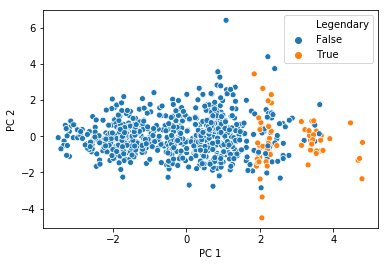

In [77]:
from sklearn.pipeline import Pipeline
poke_df = pokemon_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
pokemon_df['PC 1'] = pc[:, 0]
pokemon_df['PC 2'] = pc[:, 1]

# Use the Legendary feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=pokemon_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

#### PCA in a model pipeline

In [78]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.76522888 0.07055969 0.05685144]
1.4% test set accuracy


#### Principal component selection

In [1]:
from sklearn.datasets import fetch_openml

X,y = fetch_openml('mnist_784', return_X_y=True)

C:\Users\IanLim\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\IanLim\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
C:\Users\IanLim\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
  stacklevel=1)


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100)

In [34]:
plt.figure(figsize=(20,10))
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

<Figure size 1440x720 with 0 Axes>

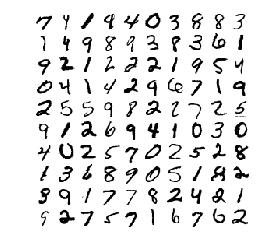

In [35]:
plot_digits(X_test)

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=78))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)

[0.05642998 0.04041476 0.03737021 0.02894264 0.02521069 0.02191371
 0.0191447  0.01740731 0.01532538 0.01396189 0.01341999 0.01201506
 0.01114072 0.01090426 0.01028011 0.00994849 0.00931566 0.00919605
 0.00888884 0.008631   0.00821787 0.00798432 0.00762688 0.00742182
 0.00716528 0.00689501 0.00681482 0.00654646 0.00627303 0.00610319
 0.00597031 0.00589346 0.00567393 0.00559497 0.00552507 0.00534436
 0.00527509 0.00515768 0.00505553 0.00477358 0.00476271 0.00464974
 0.00453391 0.00445555 0.00442312 0.00437842 0.00437186 0.00427494
 0.00424612 0.00418207 0.0040377  0.0039587  0.00392959 0.00390273
 0.00386043 0.00377098 0.00372813 0.0036703  0.00359303 0.00355821
 0.0034806  0.00343531 0.00340445 0.00337963 0.00333621 0.00329705
 0.00323926 0.00316328 0.00311757 0.00306819 0.00306193 0.00300555
 0.00297973 0.00294502 0.00291831 0.00288195 0.00286375 0.00281499]
-69641.7% test set accuracy


In [40]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Prints the number of features per dataset
print("X_test has {} features".format(X_test.shape[1]))
print("pc has {} features".format(pc.shape[1]))

X_test has 784 features
pc has 78 features


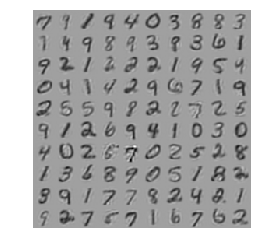

In [41]:
# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Plot the reconstructed data
plot_digits(X_rebuilt)